<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('./datasets/Churn.csv')
display(df.info()) 
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Tenure'] = df['Tenure'].fillna(0)
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1) 
y = df['Exited']
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=12345)

In [11]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape, X_val.shape)

(6000, 11) (2000, 11) (2000, 11)


In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_val[numeric] = scaler.transform(X_val[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.357205,0.076163,2,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,0.676673,0.136391,1,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.391083,0.358435,1,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-1.046457,0.651725,1,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.676673,0.813110,2,1,1,0.801922,0,0,0


### Вывод

При исследовании данных в столбце `Tenure` были обнаружены пропуски; они были заполнены нулевым значением. 

Помимо целевого столбца `Exited`, из признаков были удалены столбцы `RowNumber`, `CustomerId` и `Surname`, так как они не содержали полезной информации для обучения.

С помошью train_test_split от данных была отделена тестовая выборка размером 20%. От оставшихся данных для обучения 25% было отделено на валидационную выборку, в результате чего конечный размер обучающей выборки состовляет 60% от изначальной, а размеры тестовой и валидационной выборки - 20%.

## Исследование задачи

0.25496758000418324

<AxesSubplot:>

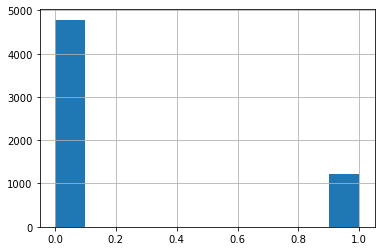

In [13]:
display((y_train == 1).sum() / (y_train == 0).sum())
y_train.hist()

In [14]:
best_f1 = 0
best_depth = 0

for depth in range(1,21):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(X_train, y_train)
    f1 = f1_score(y_val, model.predict(X_val))
    if best_f1 < f1:
        best_f1 = f1
        best_depth = depth
    
print(best_f1, best_depth)

0.5854430379746836 13


In [15]:
best_f1 = 0
best_est = 0

for est in range(1,150):
    model = RandomForestClassifier(n_estimators=est, max_depth=18, random_state=12345)
    model.fit(X_train, y_train)
    f1 = f1_score(y_val, model.predict(X_val))
    if best_f1 < f1:
        best_f1 = f1
        best_est = est
    
print(best_f1, best_est)

0.5650793650793651 103


In [16]:
model = RandomForestClassifier(n_estimators=45, max_depth=18, random_state=12345)
model.fit(X_train, y_train)
probabilities_valid = model.predict_proba(X_val)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(y_val, probabilities_one_valid)

0.8338056870003925

### Вывод

В классах был обнаружен дисбаланс приблизительно 1:4 в сторону отрицательного. Без учёта дисбаланса, наилучшие результаты модели случайного леса были:
* F1 - 0.572
* AUC-ROC - 0.844

## Борьба с дисбалансом

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [18]:
X_upsampled, y_upsamlped = upsample(X_train, y_train, 4)

best_f1 = 0
best_depth = 0

for depth in range(1,21):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(X_upsampled, y_upsamlped)
    f1 = f1_score(y_val, model.predict(X_val))
    if best_f1 < f1:
        best_f1 = f1
        best_depth = depth
    
print(best_f1, best_depth)

0.5888888888888889 20


In [19]:
best_f1 = 0
best_est = 0

for est in range(1,150):
    model = RandomForestClassifier(n_estimators=est, max_depth=10, random_state=12345)
    model.fit(X_upsampled, y_upsamlped)
    f1 = f1_score(y_val, model.predict(X_val))
    if best_f1 < f1:
        best_f1 = f1
        best_est = est
    
print(best_f1, best_est)

0.6029579067121729 128


In [20]:

model = RandomForestClassifier(n_estimators=73, max_depth=10, random_state=12345)
model.fit(X_upsampled, y_upsamlped)
display(f1_score(y_val, model.predict(X_val)))
probabilities_valid = model.predict_proba(X_val)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(y_val, probabilities_one_valid)

0.592090395480226

0.8533504790031775

In [21]:
X_downsampled, y_downsamlped = downsample(X_train, y_train, 0.25)

best_f1 = 0
best_depth = 0

for depth in range(1,21):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(X_downsampled, y_downsamlped)
    f1 = f1_score(y_val, model.predict(X_val))
    if best_f1 < f1:
        best_f1 = f1
        best_depth = depth
    
print(best_f1, best_depth)

0.5611650485436893 13


In [22]:
best_f1 = 0
best_est = 0

for est in range(1,150):
    model = RandomForestClassifier(n_estimators=est, max_depth=7, random_state=12345)
    model.fit(X_downsampled, y_downsamlped)
    f1 = f1_score(y_val, model.predict(X_val))
    if best_f1 < f1:
        best_f1 = f1
        best_est = est
    
print(best_f1, best_est)

0.5669291338582677 135


In [23]:
model = RandomForestClassifier(n_estimators=51, max_depth=7, random_state=12345)
model.fit(X_downsampled, y_downsamlped)
display(f1_score(y_val, model.predict(X_val)))
probabilities_valid = model.predict_proba(X_val)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(y_val, probabilities_one_valid)

0.5606361829025845

0.8458749457574799

### Вывод
С помощью функций upsample и downsample были подобраны и проверены две разные модели случайного леса. В них метод увеличения выборки показал наилучший результат:
* F1 - 0.593
* AUC-ROC - 0.852

## Тестирование модели

In [24]:

model = RandomForestClassifier(n_estimators=73, max_depth=10, random_state=12345)
model.fit(X_upsampled, y_upsamlped)
display(f1_score(y_test, model.predict(X_test)))
probabilities_test = model.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]
roc_auc_score(y_test, probabilities_one_test)

0.6395721925133689

0.8678802568519408

### Вывод

В ходе предобработки данных были обнаружены и заполнены пропуски. Также из признаков были удалены неинформативные столбцы. После разделения на выборки, категориальные признаки были кодированы, а количественные - масштабированы.

Модель была обучена без учёта дисбаланса, с результатами:

* F1 - 0.571
* AUC-ROC - 0.843

Были исследованы различные методы борьбы с дисбалансом. Из них метод увеличения выборки показал наилучший результат:
* F1 - 0.593
* AUC-ROC - 0.852

В результате проверки модели на тестовой выборке были получены следующие метрики:
* F1 - 0.641
* AUC-ROC - 0.867